In [1]:
import pandas as pd

In [4]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')
tags_df = pd.read_csv('tags.csv')

In [7]:
movies_df.shape

(9742, 3)

In [8]:
ratings_df.shape

(100836, 4)

In [9]:
links_df.shape

(9742, 3)

In [10]:
tags_df.shape

(3683, 4)

In [11]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [20]:
ratings_df['userId'].nunique()

610

In [21]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movie_rating_df = pd.merge(movies_df, ratings_df, on= "movieId")

In [23]:
movie_rating_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [25]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [26]:
movie_rating_df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [27]:
movie_ratings_count = movie_rating_df.groupby('movieId')['userId'].count()

In [28]:
max_rated_movie_id = movie_ratings_count.idxmax()

In [29]:
max_rated_movie_id

356

In [34]:
movie_rating_df[movie_rating_df['movieId'] == max_rated_movie_id][['title', 'genres']]

,title,genres
10019,Forrest Gump (1994),Comedy|Drama|Romance|War
10020,Forrest Gump (1994),Comedy|Drama|Romance|War
10021,Forrest Gump (1994),Comedy|Drama|Romance|War
10022,Forrest Gump (1994),Comedy|Drama|Romance|War
10023,Forrest Gump (1994),Comedy|Drama|Romance|War
...,...,...
10343,Forrest Gump (1994),Comedy|Drama|Romance|War
10344,Forrest Gump (1994),Comedy|Drama|Romance|War
10345,Forrest Gump (1994),Comedy|Drama|Romance|War
10346,Forrest Gump (1994),Comedy|Drama|Romance|War


In [42]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [40]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [37]:
movie_rating_with_links = pd.merge(movie_rating_df, links_df, on = 'movieId')

In [38]:
movie_rating_with_links.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,862.0


In [43]:
movie_rating_with_links_and_tags = pd.merge(movie_rating_with_links, tags_df, on = ['movieId','userId'])

In [45]:
movie_rating_with_links_and_tags.head()

,movieId,title,genres,userId,rating,timestamp_x,imdbId,tmdbId,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,1122227329,114709,862.0,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,978575760,114709,862.0,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,3.5,1525286001,114709,862.0,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,1528843890,113497,8844.0,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,1528843890,113497,8844.0,magic board game,1528843932


In [46]:
movie_rating_with_links_and_tags.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp_x',
       'imdbId', 'tmdbId', 'tag', 'timestamp_y'],
      dtype='object')

In [48]:
movie_rating_with_links_and_tags[movie_rating_with_links_and_tags['title'] == 'Matrix, The (1999)']['tag']

1240          martial arts
1241                sci-fi
1242    alternate universe
1243            philosophy
1244      post apocalyptic
Name: tag, dtype: object

In [49]:
terminator2_ratings = movie_rating_with_links_and_tags[movie_rating_with_links_and_tags['title'] == 'Terminator 2: Judgment Day (1991)']['rating']

In [50]:
terminator2_ratings.mean()

2.625

In [52]:
fight_club_ratings = movie_rating_with_links_and_tags[movie_rating_with_links_and_tags['title'] == 'Fight Club (1999)']['rating']

In [54]:
import matplotlib.pyplot as plt

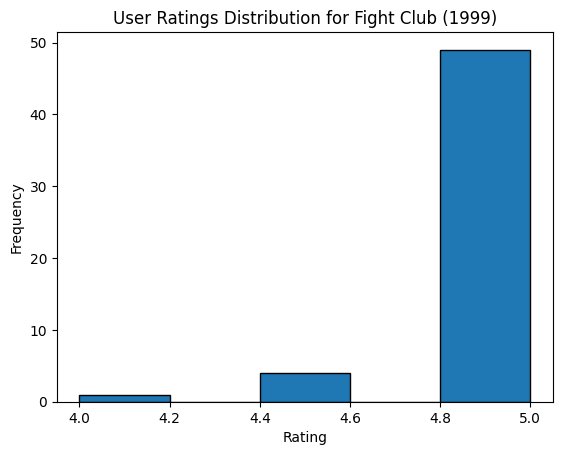

In [55]:
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [60]:
ratings_aggregated = movie_rating_df.groupby('movieId')['rating'].agg(['count', 'mean'])

In [61]:
ratings_aggregated

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [62]:
ratings_aggregated = ratings_aggregated.rename(columns={'count': 'num_ratings', 'mean': 'average_rating'})

In [63]:
ratings_aggregated

,num_ratings,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [64]:
merged_df = pd.merge(movies_df, ratings_aggregated, on='movieId', how='inner')

In [65]:
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

In [66]:
filtered_movies

,movieId,title,genres,num_ratings,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [72]:
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

In [73]:
most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
num_ratings                                    317
average_rating                            4.429022
Name: 277, dtype: object

In [74]:
top_rated_movies = filtered_movies.sort_values(by='num_ratings', ascending=False)
top_5_movies = top_rated_movies.head(5)

In [75]:
top_5_movies

,movieId,title,genres,num_ratings,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [76]:
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
top_scifi_movies = scifi_movies.sort_values(by='num_ratings', ascending=False)
third_most_popular_scifi_movie = top_scifi_movies.iloc[2]

In [77]:
third_most_popular_scifi_movie

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
num_ratings                                    238
average_rating                                3.75
Name: 418, dtype: object

In [78]:
filtered_movies_with_links = pd.merge(filtered_movies, links_df, on='movieId', how='inner')

In [80]:
filtered_movies_with_links.head()

,movieId,title,genres,num_ratings,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [84]:
highest_imdb_movie = filtered_movies_with_links.sort_values(by='imdbId', ascending=False).iloc[0]

In [86]:
highest_imdb_movie

movieId                                     109374
title             Grand Budapest Hotel, The (2014)
genres                                Comedy|Drama
num_ratings                                     52
average_rating                            3.778846
imdbId                                     2278388
tmdbId                                    120467.0
Name: 432, dtype: object

In [87]:
scifi_movies_with_links = filtered_movies_with_links[filtered_movies_with_links['genres'].str.contains('Sci-Fi')]

In [89]:
highest_imdb_scifi_movie = scifi_movies_with_links.sort_values(by='imdbId', ascending=False).iloc[0]

In [90]:
highest_imdb_scifi_movie

movieId                                   112852
title             Guardians of the Galaxy (2014)
genres                   Action|Adventure|Sci-Fi
num_ratings                                   59
average_rating                          4.050847
imdbId                                   2015381
tmdbId                                  118340.0
Name: 434, dtype: object